# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [196]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
url = "https://ycharts.com/companies/TSLA/revenues"
# Intentar primera solicitud con un agente de usuario estándar
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"
}
response = requests.get(url, headers=headers)
time.sleep(10)  # Espera opcional de 10 segundos antes de la siguiente solicitud
# Verificar si la solicitud inicial fue bloqueada
if response.status_code == 403:
    # Si se bloquea, intentar nuevamente con un agente de usuario diferente
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    time.sleep(10)  # Espera opcional de 10 segundos antes de la siguiente solicitud
# Extraer el HTML de la respuesta final
html_data = response.text
# Imprimir o manejar el HTML según sea necesario
print(html_data)









<!doctype html>
<html lang="en" ng-jq>
    <head>
        <title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>

        <meta name="viewport" content="width=device-width, initial-scale=1.0" />
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer>
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>


        
        <script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createEle

In [198]:
# Crea un objeto BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
# Busca todas las tablas en el HTML
tables = soup.find_all('table')
# Imprime la cantidad de tablas encontradas
print(f'Se encontraron {len(tables)} tablas en la página.')

Se encontraron 4 tablas en la página.


In [199]:
tables[0]

<table class="table">
<thead>
<tr>
<th>Date</th>
<th class="text-right">Value</th>
</tr>
</thead>
<tbody>
<tr>
<td>March 31, 2024</td>
<td class="text-right">
                            
                                21.30B
                            
                        </td>
</tr>
<tr>
<td>December 31, 2023</td>
<td class="text-right">
                            
                                25.17B
                            
                        </td>
</tr>
<tr>
<td>September 30, 2023</td>
<td class="text-right">
                            
                                23.35B
                            
                        </td>
</tr>
<tr>
<td>June 30, 2023</td>
<td class="text-right">
                            
                                24.93B
                            
                        </td>
</tr>
<tr>
<td>March 31, 2023</td>
<td class="text-right">
                            
                                23.33B
                       

In [200]:
import pandas as pd

for index, table in enumerate(tables):
    if (str(tables[0]) in str(table)):
        table_index = index
        break

# Create a DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:
        Date = col[0].text.strip()
        Revenue = col[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": [Date],
            "Revenue": [Revenue]
        })], ignore_index=True)

In [201]:
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Función para limpiar y convertir la columna "Revenue"
def clean_revenue(value):
    value = value.replace("B", "").strip()
    return str(int(float(value) * 1e9))

# Aplicar la función a la columna "Revenue"
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].apply(clean_revenue)

tesla_tuples = list(tesla_revenue.to_records(index=False))
tesla_revenue

,Date,Revenue
0,2024-03-31,21300000000
1,2023-12-31,25170000000
2,2023-09-30,23350000000
3,2023-06-30,24930000000
4,2023-03-31,23330000000
5,2022-12-31,24320000000
6,2022-09-30,21450000000
7,2022-06-30,16930000000
8,2022-03-31,18760000000
9,2021-12-31,17720000000


In [202]:
conn = sqlite3.connect('Tesla.db')
cursor = conn.cursor()

tesla_revenue["Date"] = tesla_revenue["Date"].astype(str)
tesla_tuples = list(tesla_revenue.to_records(index=False))
tesla_tuples

[('2024-03-31', '21300000000'),
 ('2023-12-31', '25170000000'),
 ('2023-09-30', '23350000000'),
 ('2023-06-30', '24930000000'),
 ('2023-03-31', '23330000000'),
 ('2022-12-31', '24320000000'),
 ('2022-09-30', '21450000000'),
 ('2022-06-30', '16930000000'),
 ('2022-03-31', '18760000000'),
 ('2021-12-31', '17720000000'),
 ('2021-09-30', '13760000000'),
 ('2021-06-30', '11960000000'),
 ('2021-03-31', '10390000000'),
 ('2020-12-31', '10740000000'),
 ('2020-09-30', '8771000000'),
 ('2020-06-30', '6036000000'),
 ('2020-03-31', '5985000000'),
 ('2019-12-31', '7384000000'),
 ('2019-09-30', '6303000000'),
 ('2019-06-30', '6350000000'),
 ('2019-03-31', '4541000000'),
 ('2018-12-31', '7226000000'),
 ('2018-09-30', '6824000000'),
 ('2018-06-30', '4002000000'),
 ('2018-03-31', '3409000000')]

In [203]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
conn.commit()
conn.close()

In [204]:
# Conectar a la base de datos SQLite
conn = sqlite3.connect('Tesla.db')
cursor = conn.cursor()

In [205]:
# Recuperar los datos de la base de datos
cursor.execute("SELECT * FROM tesla_revenue")
rows = cursor.fetchall()

In [206]:
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

(b'\x00\x00+\x17R\xb0\xc1\x17', b'\x005\x94\xf5\x04\x00\x00\x00')
(b'\x00\x00\x16p\x82\xc1\xa5\x17', b'\x80\xb8?\xdc\x05\x00\x00\x00')
(b'\x00\x00\xb27\x1e\x84\x89\x17', b'\x80\xb9\xc4o\x05\x00\x00\x00')
(b'\x00\x00N\xff\xb9Fm\x17', b'\x80\x9c\xf1\xcd\x05\x00\x00\x00')
(b'\x00\x009X\xeaWQ\x17', b'\x80\x8c\x93n\x05\x00\x00\x00')
(b'\x00\x00sB\xaf\xb75\x17', b'\x00\xc0\x95\xa9\x05\x00\x00\x00')
(b'\x00\x00\x0f\nKz\x19\x17', b'\x80\x06\x85\xfe\x04\x00\x00\x00')
(b'\x00\x00\xab\xd1\xe6<\xfd\x16', b'\x80L\x1b\xf1\x03\x00\x00\x00')
(b'\x00\x00\x96*\x17N\xe1\x16', b'\x00\xe2.^\x04\x00\x00\x00')
(b'\x00\x00\xd0\x14\xdc\xad\xc5\x16', b'\x00\xbe1 \x04\x00\x00\x00')
(b'\x00\x00l\xdcwp\xa9\x16', b'\x00\xf0(4\x03\x00\x00\x00')
(b'\x00\x00\x08\xa4\x133\x8d\x16', b'\x00\x1e\xdf\xc8\x02\x00\x00\x00')
(b'\x00\x00\xf3\xfcCDq\x16', b'\x80\xd1Jk\x02\x00\x00\x00')
(b'\x00\x00-\xe7\x08\xa4U\x16', b"\x00e'\x80\x02\x00\x00\x00")
(b'\x00\x00\xc9\xae\xa4f9\x16', b'\xc0\xd6\xca\n\x02\x00\x00\x00')
(b'\x00\x00ev@

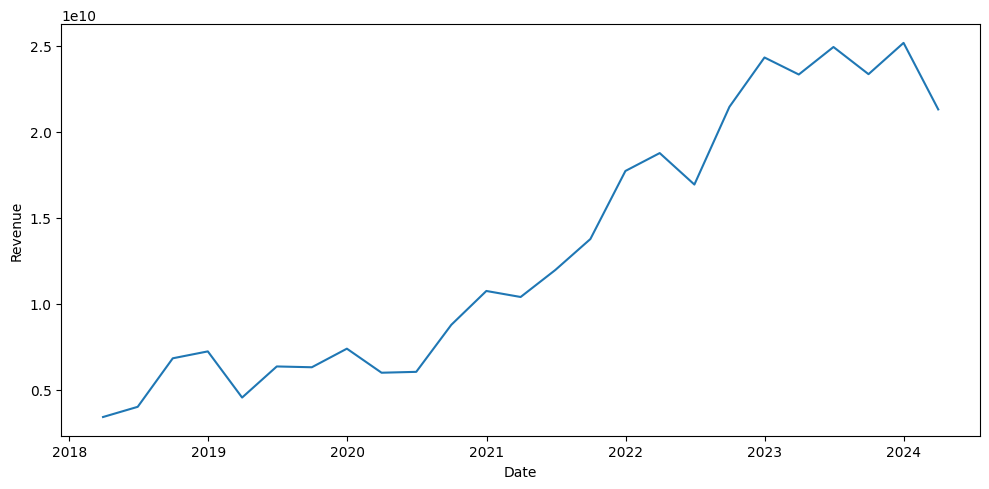

In [207]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype('int')
sns.lineplot(data = tesla_revenue, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

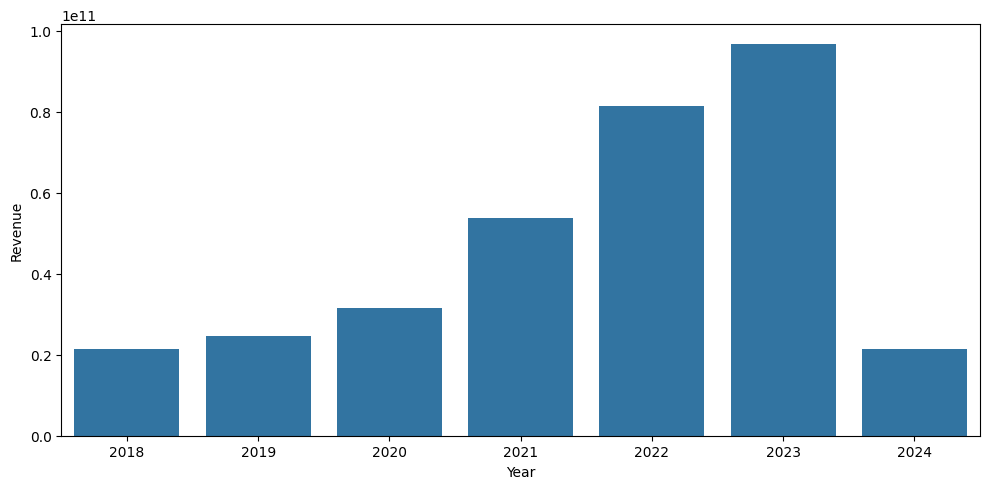

In [216]:
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

tesla_revenue["Year"] = tesla_revenue["Date"].dt.year
tesla_revenue_yearly = tesla_revenue.groupby("Year")["Revenue"].sum().reset_index()

tesla_revenue_yearly = tesla_revenue_yearly[tesla_revenue_yearly["Year"] < 2025]

# Crear el gráfico de barras
fig, axis = plt.subplots(figsize=(10, 5))
sns.barplot(data=tesla_revenue_yearly, x="Year", y="Revenue", ax=axis)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

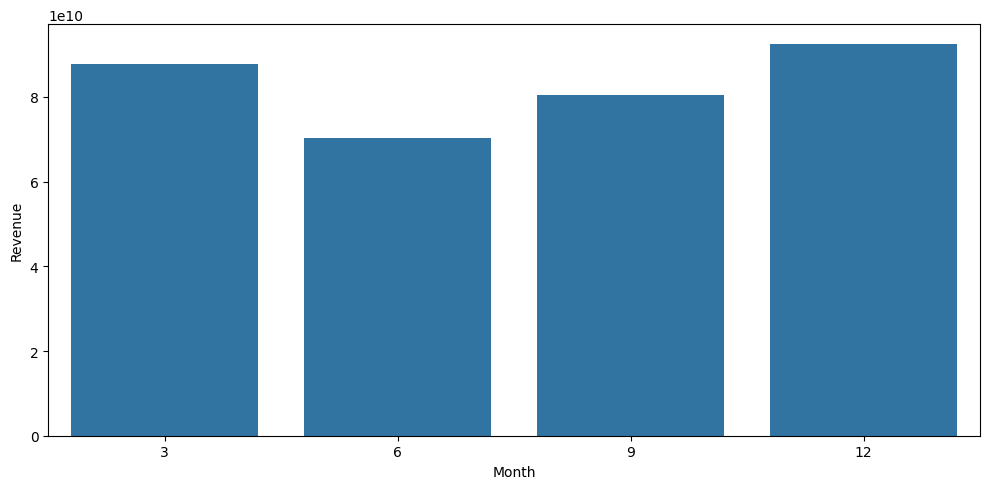

In [220]:
# Convertir la columna "Date" a formato datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Agrupar por mes y sumar los ingresos
tesla_revenue["Month"] = tesla_revenue["Date"].dt.month
tesla_revenue_monthly = tesla_revenue.groupby("Month")["Revenue"].sum().reset_index()

# Crear el gráfico de barras
fig, axis = plt.subplots(figsize=(10, 5))
sns.barplot(data=tesla_revenue_monthly, x="Month", y="Revenue", ax=axis)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()